## Assignment 3: $k$ Nearest Neighbor

**Do two questions.**

`! git clone https://github.com/DS3001/knn`

In [1]:
! git clone https://github.com/DS3001/knn

Cloning into 'knn'...
remote: Enumerating objects: 40, done.
remote: Counting objects: 100% (23/23), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 40 (delta 12), reused 12 (delta 5), pack-reused 17
Receiving objects: 100% (40/40), 11.00 MiB | 14.38 MiB/s, done.
Resolving deltas: 100% (12/12), done.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Q1.** This question is a case study for $k$ nearest neighbor The target variable `y` is `price` and the features are `year` and `mileage`.

1. Load the `./data/USA_cars_datasets.csv`. Keep the following variables and drop the rest: `price`, `year`, `mileage`. Are there any `NA`'s to handle? Look at the head and dimensions of the data.
2. Maxmin normalize `year` and `mileage`.
3. Split the sample into ~80% for training and ~20% for evaluation.
4. Use the $k$NN algorithm and the training data to predict `price` using `year` and `mileage` for the test set for $k=3,10,25,50,100,300$. For each value of $k$, compute the mean squared error and print a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase $k$?
5. Determine the optimal $k$ for these data.
6. Describe what happened in the plots of predicted versus actual prices as $k$ varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

**1. Load the ./data/USA_cars_datasets.csv. Keep the following variables and drop the rest: price, year, mileage. Are there any NA's to handle? Look at the head and dimensions of the data.**

In [ ]:
df = pd.read_csv('./knn/data/USA_cars_datasets.csv', low_memory = False)

In [ ]:
columns = ['price','year','mileage']
df = df[columns]

In [ ]:
print(df.head(), "\n")
print(df.shape)
print(df.describe())

   price  year  mileage
0   6300  2008   274117
1   2899  2011   190552
2   5350  2018    39590
3  25000  2014    64146
4  27700  2018     6654 

(2499, 3)
              price         year       mileage
count   2499.000000  2499.000000  2.499000e+03
mean   18767.671469  2016.714286  5.229869e+04
std    12116.094936     3.442656  5.970552e+04
min        0.000000  1973.000000  0.000000e+00
25%    10200.000000  2016.000000  2.146650e+04
50%    16900.000000  2018.000000  3.536500e+04
75%    25555.500000  2019.000000  6.347250e+04
max    84900.000000  2020.000000  1.017936e+06


No NA's to consider. There are 2499 rows and the count for each column is 2499, so each index has a value.

**2. Maxmin normalize year and mileage.**

In [ ]:
def maxmin(z):
    z = (z-min(z))/(max(z)-min(z))
    return(z)

In [ ]:
df['year'] = maxmin(df['year'])
df['mileage'] = maxmin(df['mileage'])
print(df.head())

   price      year   mileage
0   6300  0.744681  0.269287
1   2899  0.808511  0.187194
2   5350  0.957447  0.038892
3  25000  0.872340  0.063016
4  27700  0.957447  0.006537


**3. Split the sample into ~80% for training and ~20% for evaluation.**

In [ ]:
from sklearn.model_selection import train_test_split
y = df['price']
X = df.drop('price', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X,y, # Feature and target variables
                                                    test_size=.2, # Split the sample 80 train/ 20 test
                                                    random_state=100) # For

**4. Use the  𝑘 NN algorithm and the training data to predict price using year and mileage for the test set for  𝑘=3,10,25,50,100,300 . For each value of  𝑘 , compute the mean squared error and print a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase  𝑘 ?**

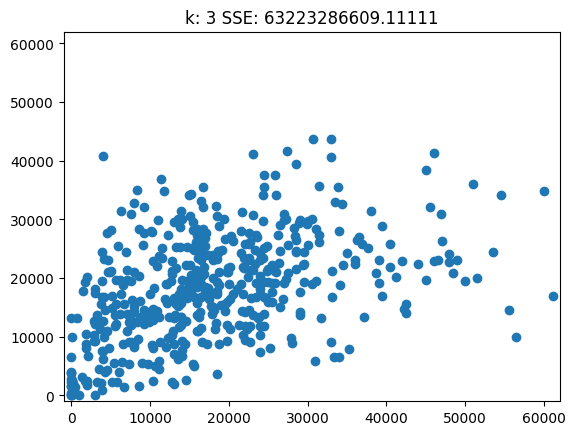

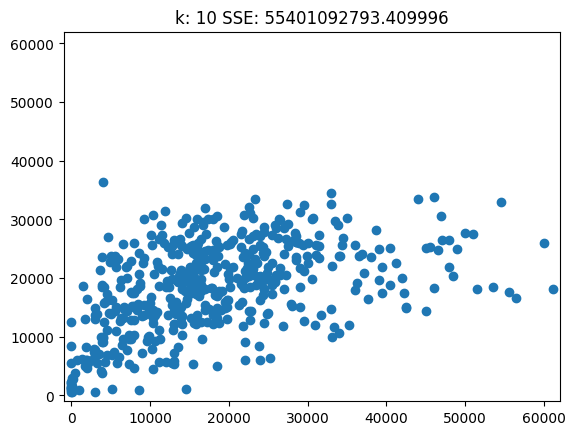

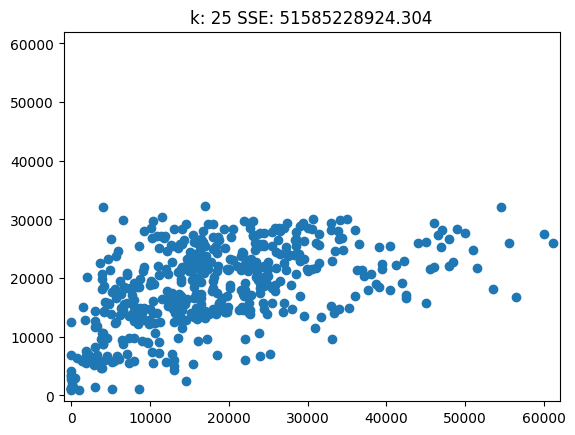

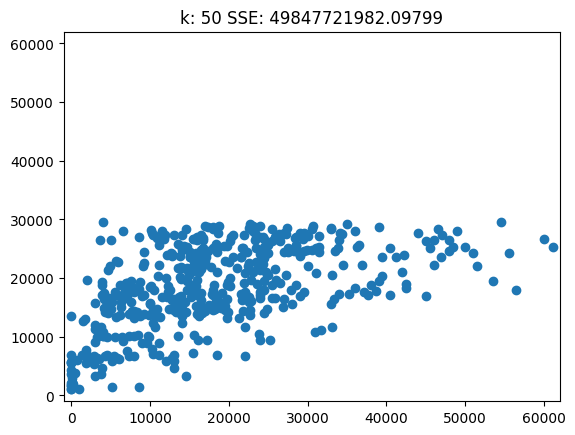

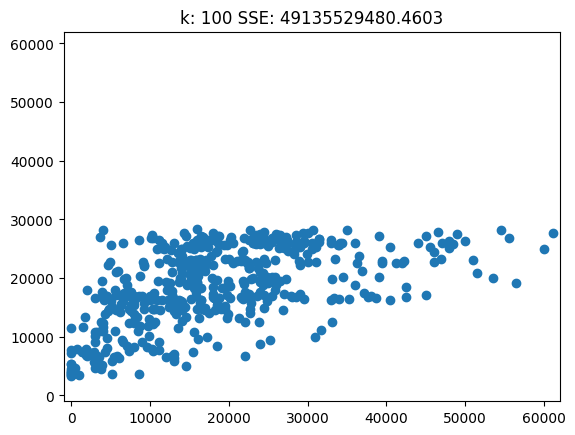

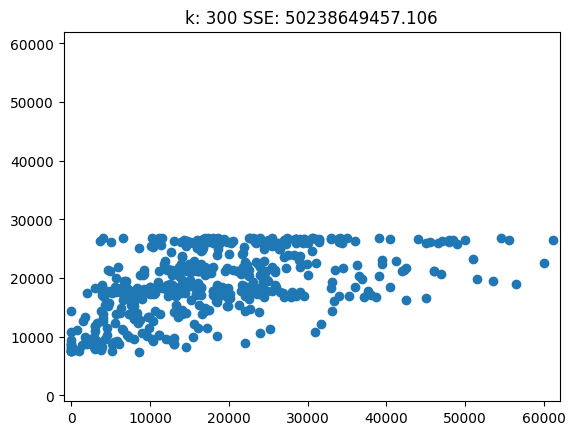

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
SSE  = np.zeros(10000)
for k in [3,10,25,50,100,300]:
  model = KNeighborsRegressor(n_neighbors=k)
  fitted_model = model.fit(X_train,y_train)
  y_hat = fitted_model.predict(X_test)
  SSE[k] = np.sum( (y_test-y_hat)**2 )
  plot,axes = plt.subplots() #create subplot for each k value
  plt.title('k: '+str(k) + " SSE: " + str(SSE[k]))
  axes.set_ylim(-1000, 62000)
  axes.set_xlim(-1000, 62000)
  plt.scatter(x= y_test ,y= y_hat)

As k increases, the data converges at around 27,500.

**5.Determine the optimal  𝑘  for these data.**

In [ ]:
k_bar = 200 # Number of k's to try
k_array = np.arange(1, k_bar) #store k values here
SSE = np.zeros(k_bar) #store SSE here

for k in range(k_bar):
    model = KNeighborsRegressor(n_neighbors=k+1) # Create a sk model for k
    fitted_model = model.fit(X_train,y_train) # Train the model on our data
    y_hat = fitted_model.predict(X_test) # Predict values for training set
    SSE[k] = np.sum( (y_test-y_hat)**2 ) # Save the computed SSE

SSE_min = np.min(SSE) # Find lowest recorded SSE
min_index = np.where(SSE==SSE_min) # Find the indices of SSE that equal the minimum
k_star = k_array[min_index] # Find the optimal value of k; why index+1?
print(k_star)


[77]


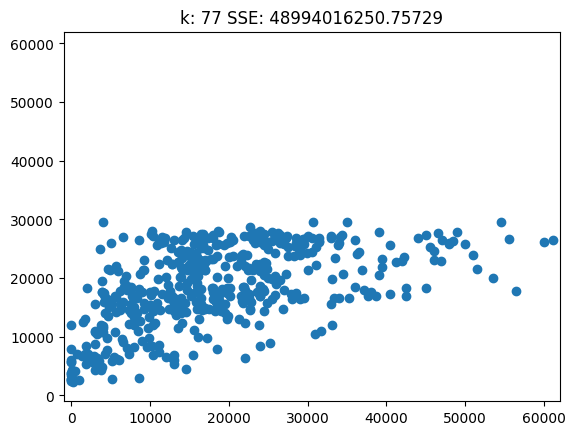

In [ ]:
k = 77
model = KNeighborsRegressor(n_neighbors=k)
fitted_model = model.fit(X_train,y_train)
y_hat = fitted_model.predict(X_test)
SSE[k] = np.sum( (y_test-y_hat)**2 )
plot,axes = plt.subplots() #create subplot for each k value
plt.title('k: '+str(k) + " SSE: " + str(SSE[k]))
axes.set_ylim(-1000, 62000)
axes.set_xlim(-1000, 62000)
plt.scatter(x= y_test ,y= y_hat)

**6.Describe what happened in the plots of predicted versus actual prices as  𝑘  varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)**

**Q2.** This question is a case study for $k$ nearest neighbor. The data for the question include:

- age: age of the patient (years)
- anaemia: decrease of red blood cells or hemoglobin (boolean)
- high blood pressure: if the patient has hypertension (boolean)
- creatinine phosphokinase (CPK): level of the CPK enzyme in the blood (mcg/L)
- diabetes: if the patient has diabetes (boolean)
- ejection fraction: percentage of blood leaving the heart at each contraction (percentage)
- platelets: platelets in the blood (kiloplatelets/mL)
- sex: woman or man (binary)
- serum creatinine: level of serum creatinine in the blood (mg/dL)
- serum sodium: level of serum sodium in the blood (mEq/L)
- smoking: if the patient smokes or not (boolean)
- time: follow-up period (days)
- death event: if the patient deceased during the follow-up period (boolean)

1. Load the `./data/heart_failure_clinical_records_dataset.csv`. Are there any `NA`'s to handle? use `.drop()` to remove `time` from the dataframe.
2. Make a correlation matrix. What variables are strongly associated with a death event?
3. For the dummy variables `anaemia`, `diabetes`, `high_blood_pressure`, `sex`, and `smoking`, compute a summary table of `DEATH_EVENT` grouped by the variable. For which variables does a higher proportion of the population die when the variable takes the value 1 rather than 0?
4. On the basis of your answers from 2 and 3, build a matrix $X$ of the variables you think are most predictive of a death, and a variable $y$ equal to `DEATH_EVENT`.
5. Maxmin normalize all of the variables in `X`.
6. Split the sample into ~80% for training and ~20% for evaluation. (Try to use the same train/test split for the whole question, so that you're comparing apples to apples in the questions below.).
7. Determine the optimal number of neighbors for a $k$NN regression for the variables you selected.
8. OK, do steps 5 through 7 again, but use all of the variables (except `time`). Which model has a lower Sum of Squared Error? Which would you prefer to use in practice, if you had to predict `DEATH_EVENT`s? If you play with the selection of variables, how much does the SSE change for your fitted model on the test data? Are more variables always better? Explain your findings.

**1. Load the ./data/heart_failure_clinical_records_dataset.csv. Are there any NA's to handle? use .drop() to remove time from the dataframe.**

In [3]:
df = pd.read_csv("./knn/data/heart_failure_clinical_records_dataset.csv", low_memory = False)
df = df.drop(['time'], axis = 1)

In [4]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,1


In [11]:
print(df.shape)
print(df.describe())

(299, 12)
              age     anaemia  creatinine_phosphokinase    diabetes  \
count  299.000000  299.000000                299.000000  299.000000   
mean    60.833893    0.431438                581.839465    0.418060   
std     11.894809    0.496107                970.287881    0.494067   
min     40.000000    0.000000                 23.000000    0.000000   
25%     51.000000    0.000000                116.500000    0.000000   
50%     60.000000    0.000000                250.000000    0.000000   
75%     70.000000    1.000000                582.000000    1.000000   
max     95.000000    1.000000               7861.000000    1.000000   

       ejection_fraction  high_blood_pressure      platelets  \
count         299.000000           299.000000     299.000000   
mean           38.083612             0.351171  263358.029264   
std            11.834841             0.478136   97804.236869   
min            14.000000             0.000000   25100.000000   
25%            30.000000      

There are no NA's to handle. There are 299 rows and the count for each column is 299.

**2. Make a correlation matrix. What variables are strongly associated with a death event?**

In [8]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'DEATH_EVENT'],
      dtype='object')

In [9]:
cor = df.loc[:,df.columns].corr()
print(cor)

                               age   anaemia  creatinine_phosphokinase  \
age                       1.000000  0.088006                 -0.081584   
anaemia                   0.088006  1.000000                 -0.190741   
creatinine_phosphokinase -0.081584 -0.190741                  1.000000   
diabetes                 -0.101012 -0.012729                 -0.009639   
ejection_fraction         0.060098  0.031557                 -0.044080   
high_blood_pressure       0.093289  0.038182                 -0.070590   
platelets                -0.052354 -0.043786                  0.024463   
serum_creatinine          0.159187  0.052174                 -0.016408   
serum_sodium             -0.045966  0.041882                  0.059550   
sex                       0.065430 -0.094769                  0.079791   
smoking                   0.018668 -0.107290                  0.002421   
DEATH_EVENT               0.253729  0.066270                  0.062728   

                          diabetes  e

The variables strongly associated with a death event are age (0.254), ejection_fraction(-0.269), and serum_creatinine(0.294).

**3. For the dummy variables anaemia, diabetes, high_blood_pressure, sex, and smoking, compute a summary table of DEATH_EVENT grouped by the variable. For which variables does a higher proportion of the population die when the variable takes the value 1 rather than 0?**

**4. On the basis of your answers from 2 and 3, build a matrix  𝑋  of the variables you think are most predictive of a death, and a variable  𝑦  equal to DEATH_EVENT.**

**5. Maxmin normalize all of the variables in X.**

**6. Split the sample into ~80% for training and ~20% for evaluation. (Try to use the same train/test split for the whole question, so that you're comparing apples to apples in the questions below.).**

**7. Determine the optimal number of neighbors for a  𝑘 NN regression for the variables you selected.**

**8. OK, do steps 5 through 7 again, but use all of the variables (except time). Which model has a lower Sum of Squared Error? Which would you prefer to use in practice, if you had to predict DEATH_EVENTs? If you play with the selection of variables, how much does the SSE change for your fitted model on the test data? Are more variables always better? Explain your findings.**

**Q3.** Let's do some very basic computer vision. We're going to import the MNIST handwritten digits data and $k$NN to predict values (i.e. "see/read").

1. To load the data, run the following code in a chunk:
```
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test
```
The `y_test` and `y_train` vectors, for each index `i`, tell you want number is written in the corresponding index in `X_train[i]` and `X_test[i]`. The value of `X_train[i]` and `X_test[i]`, however, is a 28$\times$28 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a "pixel" and the matrix encodes a representation of a number. To visualize this, run the following code to see the first ten numbers:
```
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5):
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()
```
OK, those are the data: Labels attached to handwritten digits encoded as a matrix.

2. What is the shape of `X_train` and `X_test`? What is the shape of `X_train[i]` and `X_test[i]` for each index `i`? What is the shape of `y_train` and `y_test`?
3. Use Numpy's `.reshape()` method to covert the training and testing data from a matrix into an vector of features. So, `X_test[index].reshape((1,784))` will convert the $index$-th element of `X_test` into a $28\times 28=784$-length row vector of values, rather than a matrix. Turn `X_train` into an $N \times 784$ matrix $X$ that is suitable for scikit-learn's kNN classifier where $N$ is the number of observations and $784=28*28$ (you could use, for example, a `for` loop).
4. Use the reshaped `X_test` and `y_test` data to create a $k$-nearest neighbor classifier of digit. What is the optimal number of neighbors $k$? If you can't determine this, play around with different values of $k$ for your classifier.
5. For the optimal number of neighbors, how well does your predictor perform on the test set?
6. So, this is how computers "see." They convert an image into a matrix of values, that matrix becomes a vector in a dataset, and then we deploy ML tools on it as if it was any other kind of tabular data. To make sure you follow this, invent a way to represent a color photo in matrix form, and then describe how you could convert it into tabular data. (Hint: RGB color codes provide a method of encoding a numeric value that represents a color.)